## Importing Required Libraries 

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model
import matplotlib.pyplot as plt

## Sklearn libraries

1. Scikit-learn (Sklearn) is the most useful and robust library for machine learning in Python. It provides a selection of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction via a consistence interface in Python.

In [33]:
from sklearn.metrics import \
    r2_score, get_scorer
from sklearn.linear_model import \
    Lasso, Ridge, LassoCV,LinearRegression
from sklearn.preprocessing import \
    StandardScaler, PolynomialFeatures
from sklearn.model_selection import \
    KFold, RepeatedKFold, GridSearchCV, \
    cross_validate, train_test_split


## Importing Dataset into Pandas

1. This is a type of encoding and is used to solve the UnicodeDecodeError, while attempting to read a file in Python or Pandas.

    latin-1 is a single-byte encoding which uses the characters 0 through 127, so it can encode half as many characters as latin1. It's a strict subset of both latin1 and utf8, meaning the bytes 0 through 127 in both latin1 and utf8 encode the same things as they do in ASCII.

In [2]:
df= pd.read_csv('cancer.csv',encoding='latin-1')
df.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [3]:
df.isnull().sum()

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

In [4]:
df.dtypes

avgAnnCount                float64
avgDeathsPerYear             int64
TARGET_deathRate           float64
incidenceRate              float64
medIncome                    int64
popEst2015                   int64
povertyPercent             float64
studyPerCap                float64
binnedInc                   object
MedianAge                  float64
MedianAgeMale              float64
MedianAgeFemale            float64
Geography                   object
AvgHouseholdSize           float64
PercentMarried             float64
PctNoHS18_24               float64
PctHS18_24                 float64
PctSomeCol18_24            float64
PctBachDeg18_24            float64
PctHS25_Over               float64
PctBachDeg25_Over          float64
PctEmployed16_Over         float64
PctUnemployed16_Over       float64
PctPrivateCoverage         float64
PctPrivateCoverageAlone    float64
PctEmpPrivCoverage         float64
PctPublicCoverage          float64
PctPublicCoverageAlone     float64
PctWhite            

##  After the Exploration of data,
### What we got to know
1.Shape or our data.

2.Null / Missing values in our Dataset.


## Visualizing the Data,

1.From Seaborn Countplot.

2.Heatmap for viewing the strength and directions.

3.By this we able to see Positive/Negative correlation between feature.

C:\Users\Trapti\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TARGET_deathRate', ylabel='Density'>

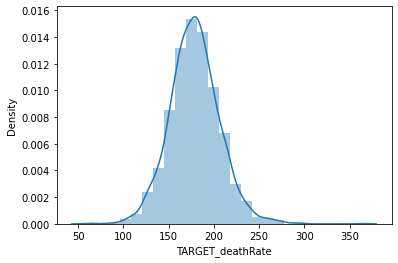

In [34]:
sns.distplot(df.TARGET_deathRate, bins = 25)

C:\Users\Trapti\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TARGET_deathRate', ylabel='count'>

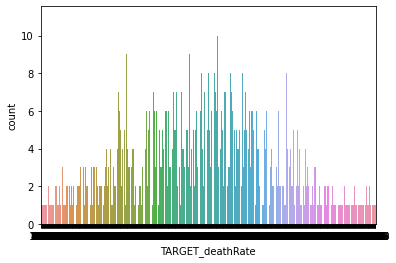

In [39]:
sns.countplot(df.TARGET_deathRate)

In [6]:
corr_matrix = abs(df.corr()) 
print(corr_matrix["TARGET_deathRate"].sort_values(ascending=False))

TARGET_deathRate           1.000000
PctBachDeg25_Over          0.485477
incidenceRate              0.449432
PctPublicCoverageAlone     0.449358
povertyPercent             0.429389
medIncome                  0.428615
PctEmployed16_Over         0.412046
PctHS25_Over               0.404589
PctPublicCoverage          0.404572
PctPrivateCoverage         0.386066
PctUnemployed16_Over       0.378412
PctPrivateCoverageAlone    0.363704
PctMarriedHouseholds       0.293325
PctBachDeg18_24            0.287817
PctEmpPrivCoverage         0.267399
PercentMarried             0.266820
PctHS18_24                 0.261976
PctBlack                   0.257024
PctOtherRace               0.189894
PctSomeCol18_24            0.188688
PctAsian                   0.186331
PctWhite                   0.177400
avgAnnCount                0.143532
popEst2015                 0.120073
avgDeathsPerYear           0.090715
PctNoHS18_24               0.088463
BirthRate                  0.087407
AvgHouseholdSize           0

## Feature Engineering part

1.Filling the Null values

2.Converting the categrical features into numeric for better performance of our Model.

3.Dropping irrelevant Feature.

4.Recheck the Data

In [7]:
def fill_missing_values(df):
    missing_val_columns = df.isnull().sum()[df.isnull().sum() > 0]
    missing_val_columns = list(missing_val_columns.index)
    for col in missing_val_columns:
        mode = df[col].mode().iloc[0]
        print(f"Filling all values in {col} column with: {mode}")
        df[col] = df[col].fillna(mode)
    return df

In [8]:
df = fill_missing_values(df)

Filling all values in PctSomeCol18_24 column with: 43.0
Filling all values in PctEmployed16_Over column with: 48.9
Filling all values in PctPrivateCoverageAlone column with: 53.0


In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
var_mod = df.select_dtypes(include='object').columns

for i in var_mod:
        df[i] = le.fit_transform(df[i])

In [10]:
df.isnull().sum()

avgAnnCount                0
avgDeathsPerYear           0
TARGET_deathRate           0
incidenceRate              0
medIncome                  0
popEst2015                 0
povertyPercent             0
studyPerCap                0
binnedInc                  0
MedianAge                  0
MedianAgeMale              0
MedianAgeFemale            0
Geography                  0
AvgHouseholdSize           0
PercentMarried             0
PctNoHS18_24               0
PctHS18_24                 0
PctSomeCol18_24            0
PctBachDeg18_24            0
PctHS25_Over               0
PctBachDeg25_Over          0
PctEmployed16_Over         0
PctUnemployed16_Over       0
PctPrivateCoverage         0
PctPrivateCoverageAlone    0
PctEmpPrivCoverage         0
PctPublicCoverage          0
PctPublicCoverageAlone     0
PctWhite                   0
PctBlack                   0
PctAsian                   0
PctOtherRace               0
PctMarriedHouseholds       0
BirthRate                  0
dtype: int64

## Splitting the Dependent and Independent Feature into (X,y)

In [11]:
X = df.drop('TARGET_deathRate',axis=1)
y = df.TARGET_deathRate

In [12]:
X.shape,y.shape

((3047, 33), (3047,))

In [13]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from math import sqrt

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 0)

###  1. Why is scaling important in ML?

Image result for why using scaling in ML
Feature scaling is essential for machine learning algorithms that calculate distances between data. ... The ML algorithm is sensitive to the “relative scales of features,” which usually happens when it uses the numeric values of the features rather than say their rank.

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled = pd.DataFrame(data = X_scaled, columns = X.columns)

## K-Fold Cross Validation

In this method, we split the data-set into k number of subsets(known as folds) then we perform training on the all the subsets but leave one(k-1) subset for the evaluation of the trained model. In this method, we iterate k times with a different subset reserved for testing purpose each time.

In [31]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
lasso_alphas = np.linspace(0, 0.2, 21)
lasso = Lasso()
grid = dict()
grid['alpha'] = lasso_alphas
gscv = GridSearchCV( \
    lasso, grid, scoring='neg_mean_absolute_error', \
    cv=cv, n_jobs=-1)
results = gscv.fit(X, y)
print('MAE: %.5f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -14.38836
Config: {'alpha': 0.14}


## Effect Of Alpha On Lasso Regression

Lasso regression is a common modeling technique to do regularization. The math behind it is pretty interesting, but practically, what you need to know is that Lasso regression comes with a parameter, alpha, and the higher the alpha, the most feature coefficients are zero.

That is, when alpha is 0, Lasso regression produces the same coefficients as a linear regression. When alpha is very very large, all coefficients are zero.

In [32]:
lasso = LassoCV(alphas=lasso_alphas, cv=cv, n_jobs=-1)
lasso.fit(X_scaled, y)
print('alpha: %.2f' % lasso.alpha_)

alpha: 0.06


C:\Users\Trapti\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Trapti\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 487510.6116144564, tolerance: 208.63097057330415
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Trapti\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Trapti\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: 

## Why we choose lasso model

1. We can use LASSO to improve overfitting in models by selecting features. It works with Linear Regression, Logistic Regression and several other models. Essentially, if the model has coefficients, LASSO can be used. Unlike other feature selection techniques, the feature selection in LASSO is endogenous. I.e., it occurs inside of the model’s algorithm. Rather than looking at every combination of features or implementing step-wise subset selection, LASSO selects for features inside the algorithm, automatically generating subset selection.

2. LASSO works by applying the L1 penalty to the loss function. Due to the shape of the constraint region implied by the L1 penalty, LASSO is likely to select spare estimates of the coefficients. I.e., some coefficients are likely to be set to 0, and in effect, the features are removed. The larger the penalty coefficient, the greater that tendency.


3. Having fewer features often reduces overfitting in the model, which is likely to improve model interpretability. Improving a model’s complexity often decreases test error.

## Thanks 